<a href="https://colab.research.google.com/github/olgasem10/Compling-tasks/blob/master/%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, \
                            KMeans, MiniBatchKMeans, Birch, MeanShift, SpectralClustering, OPTICS
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, \
                            silhouette_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn import metrics
from sklearn.datasets import make_blobs

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/data.csv', usecols = ['category_name', 'title'])

In [0]:
data

,category_name,title
0,Детская одежда и обувь,Платье праздничное для девочки
1,Мебель и интерьер,Кровать двухспальная
2,Телефоны,Samsung S3 mini gt-i8190
3,"Одежда, обувь, аксессуары","Красивое платье на одно плечо, в идеале размер м"
4,Детская одежда и обувь,Стильная панама
...,...,...
254214,Посуда и товары для кухни,Устройство для перепелиных яиц
254215,Ремонт и строительство,Гибкая черепица от производителя
254216,Детская одежда и обувь,Ботинки 33 размер
254217,Детская одежда и обувь,Комбинезон демисизонный


In [0]:
sample = data.sample(frac=0.01)
sample.shape

(2542, 2)

## Count or tfidf?

### Kmeans


In [0]:
sample = data.sample(frac=0.05)

Count Vectorizer:

In [0]:
cv = CountVectorizer(max_features = 100, max_df=1.0, min_df=8, ngram_range=(1, 3))
X = cv.fit_transform(sample['title'])
y = sample['category_name']
X.shape

(12711, 100)

In [0]:
cluster = KMeans(n_clusters=200, algorithm = 'full')
cluster.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = cluster.labels_
len(set(cluster.labels_))

200

In [0]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.852
V-measure: 0.354


Tfidf Vectorizer:

In [0]:
tf = TfidfVectorizer(max_features = 400, ngram_range=(1, 4), max_df=0.8, min_df=6)
X = tf.fit_transform(sample['title'])
y = sample['category_name']
X.shape

(12711, 400)

In [0]:
cluster = KMeans(n_clusters=200, algorithm = 'full')
cluster.fit(X)

KMeans(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=200, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = cluster.labels_
len(set(cluster.labels_))

200

In [0]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.581
V-measure: 0.410


### Birch

Count Vectorizer:

In [0]:
tf = CountVectorizer(max_features = 100, max_df=0.9, min_df=5, ngram_range=(1,4))
X = tf.fit_transform(sample['title'])


In [0]:
cluster = Birch(n_clusters=67, threshold = 0.5, branching_factor = 40)
cluster.fit(X)


Birch(branching_factor=40, compute_labels=True, copy=True, n_clusters=67,
      threshold=0.5)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.626
V-measure: 0.326


Tfidf Vectorizer:

In [0]:
tf = TfidfVectorizer(max_features = 100, max_df=0.7, min_df=6, ngram_range=(1,3))
X = tf.fit_transform(sample['title'])


In [0]:
cluster = Birch(n_clusters=67, threshold = 0.5, branching_factor = 40)
cluster.fit(X)


Birch(branching_factor=40, compute_labels=True, copy=True, n_clusters=67,
      threshold=0.5)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.729
V-measure: 0.347


### DBSCAN

Count Vectorizer:

In [0]:
tf = CountVectorizer(max_features = 100, max_df=0.8, min_df=5, ngram_range=(1,4))
X = tf.fit_transform(sample['title'])


In [0]:
cluster = DBSCAN(min_samples = 3, eps=0.4)
cluster.fit(X)


DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.911
V-measure: 0.341


Tfidf Vectorizer:

In [0]:
tf = TfidfVectorizer(max_features = 90, max_df=0.8, min_df=5, ngram_range=(1,4))
X = tf.fit_transform(sample['title'])


In [0]:
cluster = DBSCAN(min_samples = 3, eps=0.4)
cluster.fit(X)


DBSCAN(algorithm='auto', eps=0.4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=3, n_jobs=None, p=None)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.924
V-measure: 0.344


В большинстве алгоритмов с векторизацией через tfidf удалось добиться лучших результатов

### Метод локтя

In [0]:
from tqdm import tqdm
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
sample = data.sample(frac=0.05)
sample.shape

(12711, 2)

In [0]:
tf = CountVectorizer(max_features = 100, max_df=0.9, min_df=5, ngram_range=(1,4))
X = tf.fit_transform(sample['title'])


In [0]:
scores = []
tqdm._instances.clear()
for i in tqdm(range(5, 1000, 50)):
    cluster = MiniBatchKMeans(n_clusters=i, init_size=i*3)
    cluster.fit(X)
    scores.append(metrics.silhouette_score(X, cluster.labels_))

100%|██████████| 20/20 [01:15<00:00,  5.08s/it]


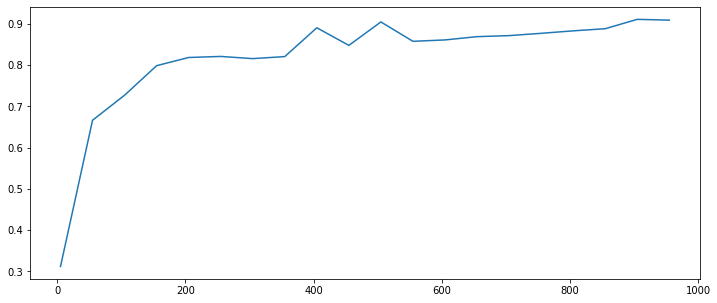

In [0]:
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 1000, 50)), scores)

После ~400 кластеров качество растет мало, поэтому можно принять это количество за оптимальное

In [0]:
sample = data.sample(frac=0.01)
sample.shape

(2542, 2)

In [0]:
tf = TfidfVectorizer(max_features = 200, max_df=0.8, min_df=5, ngram_range=(1,3))
svd = TruncatedSVD(100, n_iter = 10)
X = tf.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)

In [0]:
scores = []
tqdm._instances.clear()
for i in tqdm(range(5, 500, 20)):
    cluster = AgglomerativeClustering(n_clusters=i)
    cluster.fit(X_svd)
    scores.append(metrics.silhouette_score(X, cluster.labels_))

100%|██████████| 25/25 [00:11<00:00,  2.08it/s]


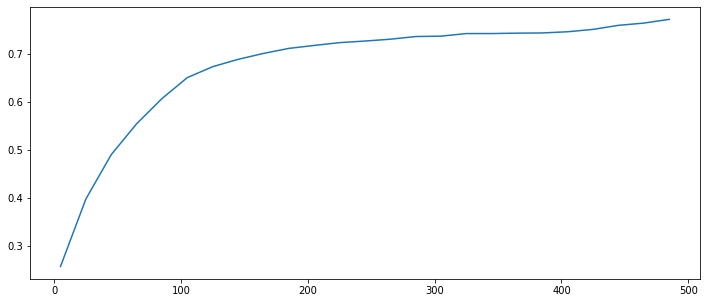

In [0]:
plt.figure(figsize=(12, 5))
plt.plot(list(range(5, 500, 20)), scores)

Сложно точно выбрать значение по правилу локтя, но оно должно находится где-то между 130-170

##SVD или NMF?

### Agglomerative Clustering

SVD


In [0]:
tf = TfidfVectorizer(max_features = 100, max_df=0.8, min_df=5, ngram_range=(1,3))
svd = TruncatedSVD(90, n_iter = 10)
X = tf.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
y = sample['category_name']

In [0]:
X_svd.shape

(12711, 90)

In [0]:
cluster = AgglomerativeClustering(n_clusters=170, linkage = 'ward')
cluster.fit(X_svd)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=170)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.866
V-measure: 0.360


NMF

In [0]:
nmf = NMF(100, init = 'nndsvd')
X_nmf = nmf.fit_transform(X)

In [0]:
cluster = AgglomerativeClustering(n_clusters=170, linkage = 'ward')
cluster.fit(X_nmf)
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.859
V-measure: 0.357


### MiniBatchKMeans

In [0]:
sample = data.sample(frac=0.05)
sample.shape

(12711, 2)

SVD


In [0]:
tf = TfidfVectorizer(max_features = 100, max_df=0.8, min_df=5, ngram_range=(1,3))
svd = TruncatedSVD(90, n_iter = 10)
X = tf.fit_transform(sample['title'])
X_svd = svd.fit_transform(X)
y = sample['category_name']

In [0]:
X_svd.shape

(12711, 90)

In [0]:
cluster = MiniBatchKMeans(n_clusters=750)
cluster.fit(X_svd)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=750, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.893
V-measure: 0.360


NMF

In [0]:
nmf = NMF(100, init = 'nndsvd')
X_nmf = nmf.fit_transform(X)

In [0]:
cluster = MiniBatchKMeans(n_clusters=750)
cluster.fit(X_nmf)
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=300 should be larger than k=750. Setting it to 3*k
  init_size=init_size)


Silhouette Coefficient: 0.919
V-measure: 0.359


### Spectural clastering

SVD

In [0]:
cluster = SpectralClustering(n_clusters=50, n_init = 15)
cluster.fit(X_svd)

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=50, n_components=None,
                   n_init=15, n_jobs=None, n_neighbors=10, random_state=None)

In [0]:
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.701
V-measure: 0.331


NMF

In [0]:
cluster = SpectralClustering(n_clusters=50, n_init = 15)
cluster.fit(X_nmf)
labels = cluster.labels_
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Silhouette Coefficient: 0.699
V-measure: 0.332


В большинстве алгоритмов SVD показал лучший результат, но разрыв с MNF был не очень значительный

##Выборсы

1) Пробуем вместо слов использовать символьные нграммы


In [0]:
#tf = TfidfVectorizer(max_df=0.9, min_df=10, ngram_range=(1,4))
tf = TfidfVectorizer(analyzer = 'char_wb', max_df=0.6, min_df=10, ngram_range=(10,15))
X = tf.fit_transform(sample['title'])

In [0]:
X.shape

(2542, 133)

In [0]:
tf.vocabulary_

In [0]:
cluster = DBSCAN(min_samples = 2)
cluster.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=2, n_jobs=None, p=None)

In [0]:
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:10]

216


,category_name,title,cluster
23501,Ноутбуки,Ноутбук Asus 4 ядра 3 Гб озу 500 HDD,-1
6494,"Одежда, обувь, аксессуары",Ветровка Adidas Neo,-1
195696,Детская одежда и обувь,Кеды для мальчика,-1
182723,Детская одежда и обувь,Комплект на девочку,-1
63682,Ноутбуки,Продам отличный ноутбук Acer 5250,-1
207410,"Одежда, обувь, аксессуары",Продам сапоги,-1
50442,Аудио и видео,В продаже б/у телевизор LG,-1
184598,"Одежда, обувь, аксессуары",Кофта женская,-1
211049,Мебель и интерьер,Продам часы,-1
70265,Мебель и интерьер,Часы настенные под стеклом,-1


In [0]:
nmf = NMF(100, init = 'nndsvd')
X_nmf = nmf.fit_transform(X)

In [0]:
cluster = OPTICS(min_samples = 3)
cluster.fit(X_nmf)

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=None, min_samples=3, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [0]:
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

159


,category_name,title,cluster
6494,"Одежда, обувь, аксессуары",Ветровка Adidas Neo,-1
195696,Детская одежда и обувь,Кеды для мальчика,-1
182723,Детская одежда и обувь,Комплект на девочку,-1
50442,Аудио и видео,В продаже б/у телевизор LG,-1
184598,"Одежда, обувь, аксессуары",Кофта женская,-1


Размер "мусорного" кластера сокращается, но при этом в него по-прежнему попадают обычные объявления

2) Пробуем менять количество признаков

In [0]:
tf = TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1,5))
X = tf.fit_transform(sample['title'])

In [0]:
X.shape

(2542, 1515)

In [0]:
cluster = DBSCAN(min_samples = 2)
cluster.fit(X)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

1255


,category_name,title,cluster
39170,Оборудование для бизнеса,Рохля гидравлическая lema 2WLO до 2000 кг,-1
187615,"Одежда, обувь, аксессуары","Костюм спортивный,женский Demix",-1
11804,Коллекционирование,"Дендритический кварц 14,52 карат",-1
161015,"Одежда, обувь, аксессуары",Женские туфли,-1
23501,Ноутбуки,Ноутбук Asus 4 ядра 3 Гб озу 500 HDD,-1


In [0]:
nmf = NMF(200, init = 'nndsvd')
X_nmf = nmf.fit_transform(X)

In [0]:
cluster = OPTICS(min_samples = 3)
cluster.fit(X_nmf)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

720


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


,category_name,title,cluster
39170,Оборудование для бизнеса,Рохля гидравлическая lema 2WLO до 2000 кг,-1
187615,"Одежда, обувь, аксессуары","Костюм спортивный,женский Demix",-1
11804,Коллекционирование,"Дендритический кварц 14,52 карат",-1
87124,"Одежда, обувь, аксессуары",Туника,-1
6494,"Одежда, обувь, аксессуары",Ветровка Adidas Neo,-1


In [0]:
tf = TfidfVectorizer(max_df=0.8, min_df=6, ngram_range=(1,3))
X = tf.fit_transform(sample['title'])

In [0]:
X.shape

(2542, 252)

In [0]:
cluster = DBSCAN(min_samples = 2)
cluster.fit(X)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

419


,category_name,title,cluster
187615,"Одежда, обувь, аксессуары","Костюм спортивный,женский Demix",-1
11804,Коллекционирование,"Дендритический кварц 14,52 карат",-1
68438,Телефоны,iPhone 6 16gb gold,-1
6494,"Одежда, обувь, аксессуары",Ветровка Adidas Neo,-1
195696,Детская одежда и обувь,Кеды для мальчика,-1


In [0]:
nmf = NMF(100, init = 'nndsvd')
X_nmf = nmf.fit_transform(X)
cluster = OPTICS(min_samples = 3)
cluster.fit(X_nmf)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

310


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


,category_name,title,cluster
39170,Оборудование для бизнеса,Рохля гидравлическая lema 2WLO до 2000 кг,-1
182723,Детская одежда и обувь,Комплект на девочку,-1
63682,Ноутбуки,Продам отличный ноутбук Acer 5250,-1
207410,"Одежда, обувь, аксессуары",Продам сапоги,-1
176282,Телефоны,Очки Виртуальной Реальности Samsung,-1


 Чем больше признаков, тем больше объявлений попадают в -1 кластер

3) Пробуем менять параметры алгоритмов кластеризации

In [0]:
cluster = DBSCAN(min_samples = 2, eps = 0.8)
cluster.fit(X)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

63


,category_name,title,cluster
28300,Детская одежда и обувь,"Жилет для девочки HM, р.140",-1
33393,Детская одежда и обувь,Фирменный зимний костюм Adidas и шапка на 10-1...,-1
125854,Бытовая техника,Машинка Стиральная,-1
156567,Квартиры,"1-к квартира, 42.9 м², 18/18 эт.",-1
86856,Детская одежда и обувь,Обувь весенняя р.37,-1


In [0]:
cluster = OPTICS(min_samples = 2, max_eps = 0.8)
cluster.fit(X_nmf)
sample['cluster'] = cluster.labels_
print(len(sample[sample.cluster==-1]))
sample[sample.cluster==-1][:5]

204


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_optics.py:802: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


,category_name,title,cluster
195696,Детская одежда и обувь,Кеды для мальчика,-1
182723,Детская одежда и обувь,Комплект на девочку,-1
63682,Ноутбуки,Продам отличный ноутбук Acer 5250,-1
207410,"Одежда, обувь, аксессуары",Продам сапоги,-1
176282,Телефоны,Очки Виртуальной Реальности Samsung,-1


При уменьшении min_samples (минимальное количество объектов в одном кластере) и увеличении eps (максимальное расстояние между двумя объектами в одном кластере), количество объявлений в -1 кластере удается еще сократить, но они по-прежнему не представляют собой ничего странного 

Просматривая выдачи -1 кластера при разных параметрах, удалось найти несколько более-менее необычных объявлений, которые содержат ошибки, сокращения или в которых без указания категории было бы сложно определить о чем идет речь:

In [0]:
mist = data.loc[[253676, 133710, 199734, 225816, 11609, 99125, 80259, 115733, 71978, 251272, 206242, 138690, 112509, 186029	], : ]
mist

,category_name,title
253676,"Одежда, обувь, аксессуары",Продаю новые
133710,Товары для детей и игрушки,Продам велик колеса на 12
199734,Книги и журналы,Пособие для детей от 1 г
225816,Детская одежда и обувь,Демары 20-21 размер
11609,Охота и рыбалка,"Спиннин штекерный из 2х колен,10-30гр"
99125,Собаки,Годовалый кабель ищет девочку
80259,Телефоны,Новый сот тел
115733,Товары для компьютера,Продам комплект материнка + проц
71978,"Одежда, обувь, аксессуары",Новое на весну
251272,Телефоны,Продам 5s


Остальные объявления, попадающие в noisy cluster, по-видимому просто содержат относительно редкие слова, из-за чего алгоритм не может объединить их в кластер с другими объявлениями